In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Preprocesamiento de imágenes
train_dir = 'train'


# Función para eliminar ruido de las imágenes usando OpenCV
def remove_noise(img):
    return cv2.GaussianBlur(img, (5, 5), 0)  # Aplicamos un filtro gaussiano para suavizar

# Función personalizada para aplicar en ImageDataGenerator
def preprocessing_function(image):
    # Convertimos a formato array
    img_array = np.array(image)
    
    # Eliminar ruido
    img_array = remove_noise(img_array)
    
    # Devolver la imagen preprocesada como array
    return img_array

# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(
    rescale=1/255.0,           # Normalización de valores de píxeles entre 0 y 1
    preprocessing_function=preprocessing_function  # Eliminar ruido mediante filtrado
)

test = train_datagen.flow_from_directory(
    'test',  # Directorio de entrenamiento
    target_size=(224, 224),  # Ajustar tamaño a 224x224
    batch_size=256,
    class_mode='binary'  # Clasificación binaria (Benign/Malignant)
)

# Cargar imágenes desde los directorios de entrenamiento y prueba
train_generator = train_datagen.flow_from_directory(
    'train',  # Directorio de entrenamiento
    target_size=(224, 224),  # Ajustar tamaño a 224x224
    batch_size=256,
    class_mode='binary'  # Clasificación binaria (Benign/Malignant)
)


Found 2000 images belonging to 2 classes.
Found 11879 images belonging to 2 classes.


In [2]:

# Definir el modelo denso

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:

# Compilar el modelo
#model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 256)  │        37,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,880,481 (10.99 MB)

 Trainable params: 2,880,481 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
"""# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    batch_size=32
)"""

# Entrenar el modelo y guardar el historial en una variable
history = model.fit(
    train_generator,  # Generador de datos de entrenamiento
    steps_per_epoch=64,  # Número de pasos por epoch
    verbose=1,  # Muestra el progreso del entrenamiento
    validation_data=test
)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 6/64 ━━━━━━━━━━━━━━━━━━━━ 6:35 7s/step - accuracy: 0.5009 - loss: 63927.7617

KeyboardInterrupt: 

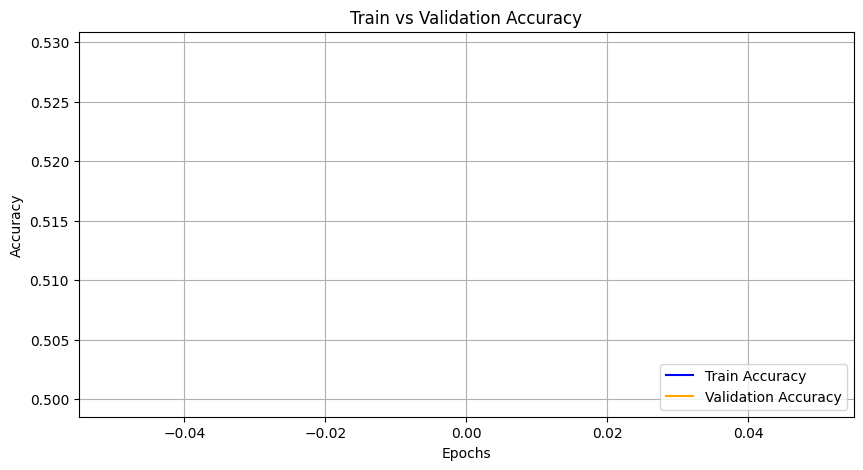

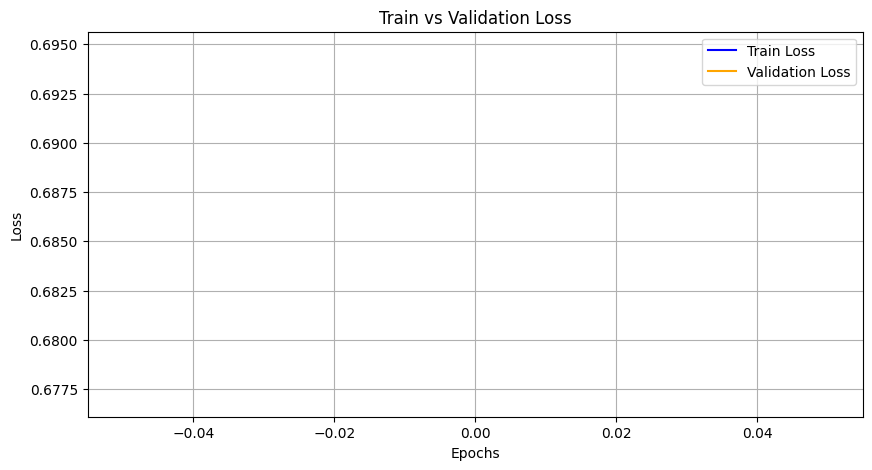

In [ ]:
# Obtener los datos del historial de entrenamiento
acc = history.history['accuracy']  # Precisión en entrenamiento
val_acc = history.history['val_accuracy']  # Precisión en validación

loss = history.history['loss']  # Pérdida en entrenamiento
val_loss = history.history['val_loss']  # Pérdida en validación

epochs_range = range(len(acc))

# Gráfica de Train Accuracy vs Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Train Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Gráfica de Train Loss vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, loss, label='Train Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()